<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/4_Aprendizaje_no_supervisado/3_Taller_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Econom√≠a I**

- üë©‚Äçüè´ **Profesora:** [Lina Mar√≠a Castro](https://www.linkedin.com/in/lina-maria-castro)  
- üìß **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- üéì **Universidad:** Universidad Externado de Colombia - Facultad de Econom√≠a

# **Taller: An√°lisis de Componentes Principales - PCA**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

-
-

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre ‚ÄúTaller_PCA_apellidos_estudiantes.ipynb‚Äù.

**Plazo de entrega**

Hoy, 21 de octubre, m√°ximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no ser√° tenido en cuenta.

**Instrucciones Generales**

Completa el c√≥digo en las celdas marcadas con `### TU C√ìDIGO AQU√ç ###`. Puedes a√±adir m√°s celdas si lo requieres.

**Caso de Estudio: Consultor√≠a para "Inversiones Inmobiliarias S.A."** üè¢

**El Escenario:**

Acaban de ser contratados como analistas de datos en **"Inversiones Inmobiliarias S.A."**, una firma l√≠der en el sector de bienes ra√≠ces en la regi√≥n. La firma est√° buscando expandir sus operaciones, pero se enfrenta a un desaf√≠o com√∫n: el mercado inmobiliario es complejo y est√° influenciado por una multitud de factores.

**El Problema:**

El equipo de valoraci√≥n de propiedades actualmente utiliza modelos basados principalmente en metros cuadrados y n√∫mero de habitaciones. Sin embargo, saben que factores como la **ubicaci√≥n** (proximidad a parques, hospitales, transporte), la **seguridad** (tasa de criminalidad) y las **caracter√≠sticas intr√≠nsecas** de la propiedad (ba√±os, tama√±o) interact√∫an de formas complejas. Tienen muchos datos (`houses.csv`), pero les cuesta extraer una visi√≥n clara y concisa de qu√© define realmente el "atractivo" de una propiedad m√°s all√° de lo obvio. Comparar propiedades con perfiles multidimensionales diferentes es dif√≠cil y propenso a errores.

**Su Misi√≥n (como consultores):**

La direcci√≥n les ha encargado aplicar t√©cnicas avanzadas de *machine learning* para abordar este problema. Espec√≠ficamente, quieren que utilicen el **An√°lisis de Componentes Principales (PCA)** para:

1.  **Reducir la Complejidad:** Tomar las m√∫ltiples caracter√≠sticas de las propiedades y destilarlas en un n√∫mero menor de "factores" o "√≠ndices" clave que capturen la esencia de lo que impulsa el valor.
2.  **Crear √çndices Interpretables:** No basta con reducir dimensiones; deben poder explicar qu√© significan estos nuevos √≠ndices en t√©rminos de negocio (ej. "√çndice de Tama√±o y Comodidades", "√çndice de Calidad de Ubicaci√≥n").

**Su Entregable:**

Deber√°n completar este Jupyter Notebook, realizando el an√°lisis de PCA sobre el dataset `houses.csv`, interpretando los componentes principales y creando las visualizaciones solicitadas. Sus conclusiones ser√°n presentadas al comit√© de inversiones para ayudarles a tomar decisiones m√°s informadas.

# 1. Importa las librer√≠as necesarias

In [1]:
### TU C√ìDIGO AQU√ç ###
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

### Mejorar visualizaci√≥n de dataframes y gr√°ficos

In [2]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualizaci√≥n
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2 Carga el dataset "houses.csv" que se encuentra en el repositorio del curso, carpeta "datasets" y muestra las primeras 5 filas.

In [3]:
### TU C√ìDIGO AQU√ç ###
path = 'C:\\Users\\Ferney Reina\\Documents\\Python\\IA_Economia\\2025-segundo-semestre-ia-economia\\datasets'
os.chdir(path)

In [4]:
df = pd.read_csv('houses.csv', sep=',')
df.head()

Id Region  Bedrooms  Bathrooms  Square_Meters  Dist_to_Park  \
0   0  South         1          1             53           592   
1   1   East         3          2             70           640   
2   2  North         2          2             79          1831   
3   3   West         6          5            189           255   
4   4   West         7          6            199          1602   

   Dist_to_Hospital  Dist_to_Underground  Dist_to_School Crime_Rate   Price  
0              2436                 2663             963       High  550353  
1               652                 2532             510       High  780430  
2              1485                 7837             586     Medium  455771  
3               974                 2523            1152        Low  766631  
4               584                 9690             615     Medium  757092

# 3. An√°lisis Exploratorio y Preprocesamiento de Datos

PCA tiene dos requisitos fundamentales:
1.  **Solo funciona con variables num√©ricas.**
2.  **Es muy sensible a la escala de las variables.**

Por lo tanto, nuestro trabajo en esta secci√≥n es: identificar las variables relevantes, convertirlas a un formato num√©rico y estandarizarlas.

## 3.1. Revisa si hay valores nulos y muestra el tipo de dato de cada una de las columnas

In [5]:
### TU C√ìDIGO AQU√ç ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1000 non-null   int64 
 1   Region               1000 non-null   object
 2   Bedrooms             1000 non-null   int64 
 3   Bathrooms            1000 non-null   int64 
 4   Square_Meters        1000 non-null   int64 
 5   Dist_to_Park         1000 non-null   int64 
 6   Dist_to_Hospital     1000 non-null   int64 
 7   Dist_to_Underground  1000 non-null   int64 
 8   Dist_to_School       1000 non-null   int64 
 9   Crime_Rate           1000 non-null   object
 10  Price                1000 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 86.1+ KB


In [6]:
df['Crime_Rate'] = df['Crime_Rate'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1000 non-null   int64 
 1   Region               1000 non-null   object
 2   Bedrooms             1000 non-null   int64 
 3   Bathrooms            1000 non-null   int64 
 4   Square_Meters        1000 non-null   int64 
 5   Dist_to_Park         1000 non-null   int64 
 6   Dist_to_Hospital     1000 non-null   int64 
 7   Dist_to_Underground  1000 non-null   int64 
 8   Dist_to_School       1000 non-null   int64 
 9   Crime_Rate           1000 non-null   string
 10  Price                1000 non-null   int64 
dtypes: int64(9), object(1), string(1)
memory usage: 86.1+ KB


## 3.2. Codifica las Variables Categ√≥ricas Region y Crime_Rate

* **Region:** Es una variable nominal (no hay un orden inherente). Por tanto, usa **One-Hot Encoding**. Incluye en el c√≥digo drop_first=True y dtype=int.
* **Crime_Rate:** Es una variable ordinal (Low < Medium < High). Por tanto, dale un valor num√©rico seg√∫n este diccionario: mapping = {'High': 3, 'Medium': 2, 'Low': 1}

In [7]:
### TU C√ìDIGO AQU√ç ###
# region
df = pd.get_dummies(df, columns=['Region'], prefix='Region', drop_first=True, dtype=int)
df.head()


Id  Bedrooms  Bathrooms  Square_Meters  Dist_to_Park  Dist_to_Hospital  \
0   0         1          1             53           592              2436   
1   1         3          2             70           640               652   
2   2         2          2             79          1831              1485   
3   3         6          5            189           255               974   
4   4         7          6            199          1602               584   

   Dist_to_Underground  Dist_to_School Crime_Rate   Price  Region_North  \
0                 2663             963       High  550353             0   
1                 2532             510       High  780430             0   
2                 7837             586     Medium  455771             1   
3                 2523            1152        Low  766631             0   
4                 9690             615     Medium  757092             0   

   Region_South  Region_West  
0             1            0  
1             0            0  
2             0            0  
3             0            1  
4             0            1

In [8]:
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Crime_Rate_Encoded'] = df['Crime_Rate'].map(mapping)
df = df.drop(columns=['Crime_Rate'])
df.head()

Id  Bedrooms  Bathrooms  Square_Meters  Dist_to_Park  Dist_to_Hospital  \
0   0         1          1             53           592              2436   
1   1         3          2             70           640               652   
2   2         2          2             79          1831              1485   
3   3         6          5            189           255               974   
4   4         7          6            199          1602               584   

   Dist_to_Underground  Dist_to_School   Price  Region_North  Region_South  \
0                 2663             963  550353             0             1   
1                 2532             510  780430             0             0   
2                 7837             586  455771             1             0   
3                 2523            1152  766631             0             0   
4                 9690             615  757092             0             0   

   Region_West  Crime_Rate_Encoded  
0            0                   2  
1            0                   2  
2            0                   1  
3            1                   0  
4            1                   1

## 3.3. Selecci√≥n y Estandarizaci√≥n de Variables

Ahora seleccionaremos todas las variables predictoras (features) y las estandarizaremos. La estandarizaci√≥n (dejar cada variable con media 0 y desviaci√≥n est√°ndar 1) es **crucial**. Si no lo hici√©ramos, la variable con la mayor escala (por ejemplo, `Square_Meters`) dominar√≠a el an√°lisis de PCA, ya que PCA busca maximizar la varianza.

In [9]:
# Seleccionamos las columnas que usaremos para PCA
# Excluimos el ID, las categ√≥ricas originales y el precio (nuestra variable respuesta)
features = ['Bedrooms', 'Bathrooms', 'Square_Meters', 'Dist_to_Park',
            'Dist_to_Hospital', 'Dist_to_Underground', 'Dist_to_School',
            'Crime_Rate_Encoded', 'Region_North', 'Region_South', 'Region_West']

X = df[features]
y = df['Price']

In [10]:
X.head()

Bedrooms  Bathrooms  Square_Meters  Dist_to_Park  Dist_to_Hospital  \
0         1          1             53           592              2436   
1         3          2             70           640               652   
2         2          2             79          1831              1485   
3         6          5            189           255               974   
4         7          6            199          1602               584   

   Dist_to_Underground  Dist_to_School  Crime_Rate_Encoded  Region_North  \
0                 2663             963                   2             0   
1                 2532             510                   2             0   
2                 7837             586                   1             1   
3                 2523            1152                   0             0   
4                 9690             615                   1             0   

   Region_South  Region_West  
0             1            0  
1             0            0  
2             0            0  
3             0            1  
4             0            1

In [11]:
y

0       550353
1       780430
2       455771
3       766631
4       757092
        ...   
995     592691
996     545534
997     650564
998     452658
999    1016555
Name: Price, Length: 1000, dtype: int64

Estandariza las variables que se encuentran en X. Llama al nuevo objeto X_scaled.

In [12]:
### TU C√ìDIGO AQU√ç ###
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Dimensiones de los datos estandarizados:', X_scaled.shape)

Dimensiones de los datos estandarizados: (1000, 11)


## 3.4. Grafica un mapa de calor para ver las correlaciones entre las variables predictoras (features).

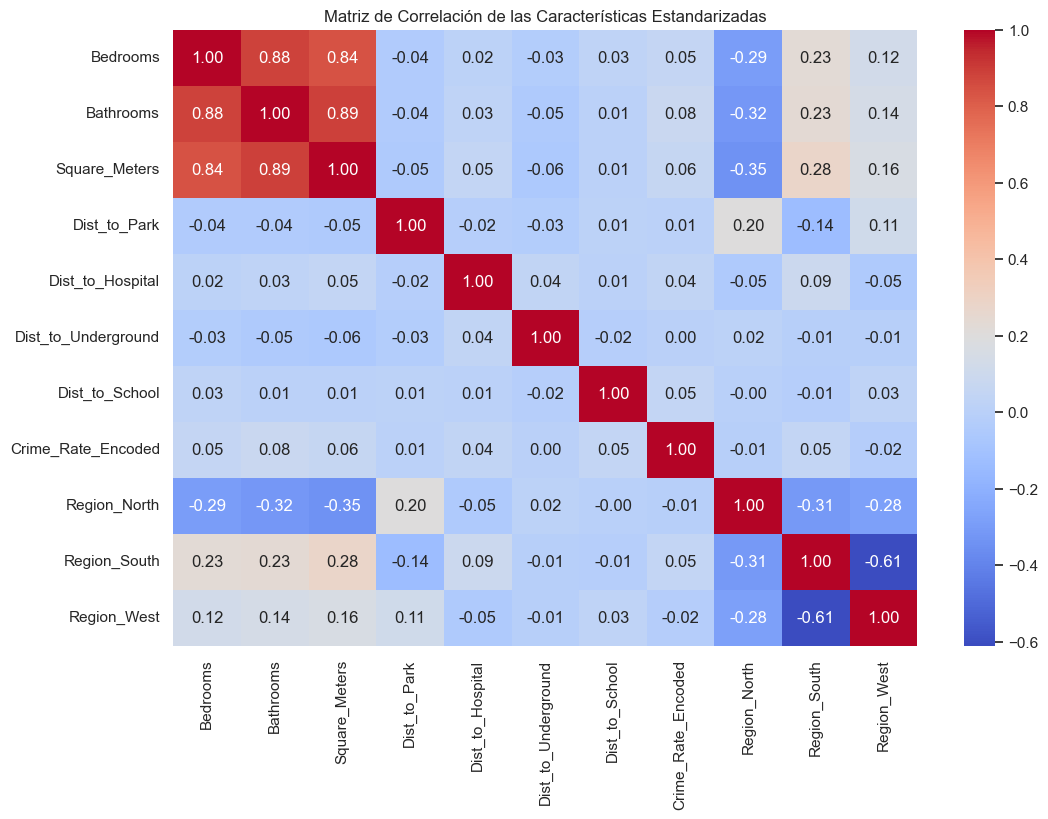

In [13]:
### TU C√ìDIGO AQU√ç ###
corr = pd.DataFrame(X_scaled, columns=features).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlaci√≥n de las Caracter√≠sticas Estandarizadas')
plt.show()

## 3.5. Escribe un an√°lisis sobre las correlaciones observadas. Haz √©nfasis en las correlaciones m√°s altas (positivas o negativas).

# 4. Aplicando el An√°lisis de Componentes Principales (PCA)

Con los datos limpios y estandarizados, es hora de aplicar PCA. Nuestro objetivo es determinar cu√°ntos componentes principales necesitamos para capturar una cantidad significativa de la "informaci√≥n" (varianza) de nuestros datos originales.

## 4.1. Instancia PCA. No especifiques n_components para calcularlos todos. Ajusta PCA a los datos escalados.

In [14]:
### TU C√ìDIGO AQU√ç ###
pca = PCA()
pca.fit(X_scaled)

PCA()

## 4.2. Varianza Explicada

El aspecto m√°s importante de PCA es la **varianza explicada**. Cada componente principal explica un porcentaje de la varianza total de los datos. El primer componente siempre explica la mayor parte, el segundo un poco menos, y as√≠ sucesivamente.

Grafica la varianza explicada acumulada para decidir cu√°ntos componentes son suficientes.

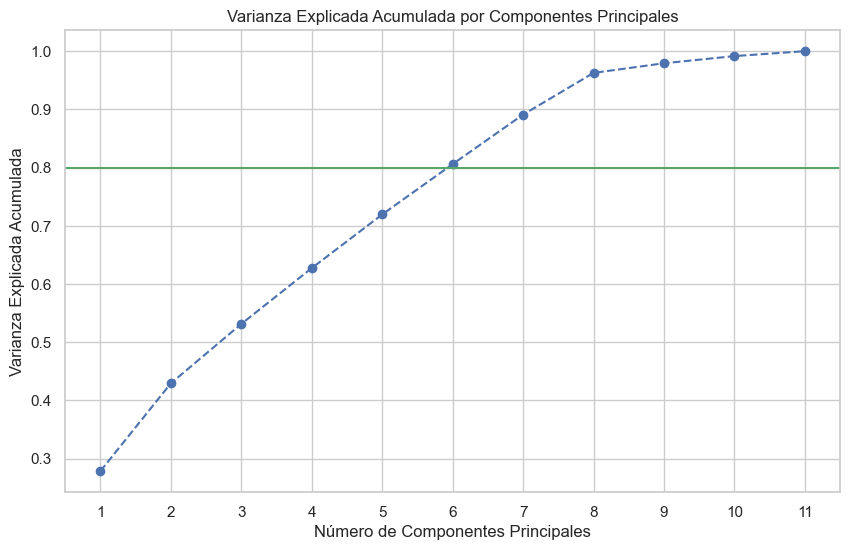

In [16]:
### TU C√ìDIGO AQU√ç ###
varianza_explicada_acumulada =pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('N√∫mero de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.xticks(range(1, len(varianza_explicada_acumulada) + 1))
plt.axhline(y=0.8, color='g', linestyle='-', label='80% de Varianza')
plt.show()

Este gr√°fico es nuestra herramienta de decisi√≥n. Nos muestra el **trade-off entre simplicidad e informaci√≥n**.
- Si queremos el modelo m√°s simple posible, podr√≠amos usar 2 o 3 componentes, pero solo explicar√≠amos 40-50% de la variabilidad en los datos (perder√≠amos mucha informaci√≥n).
- Una regla com√∫n en la industria es mantener suficientes componentes para explicar entre el 90% y el 95% de la varianza.

## 4.3. ¬øCon cu√°ntos componentes se captura el 90% de la informaci√≥n contenida en nuestras 11 variables originales?

Cantidad de componentes necesarios esta entre 7 y 8 para capturar el 90% de la varianza.

# 5. Re-aplicando PCA indicando el N√∫mero de Componentes Deseados

Corre PCA de nuevo, pero esta vez especificando que queremos quedarnos con 4 componentes.

In [17]:
### TU C√ìDIGO AQU√ç ###
pca_2 = PCA(n_components=4)
x_pca_2 = pca_2.fit_transform(X_scaled)

print('Dimensiones originales de los datos:', X_scaled.shape)
print('Dimensiones de los datos reducidos:', x_pca_2.shape)

Dimensiones originales de los datos: (1000, 11)
Dimensiones de los datos reducidos: (1000, 4)


In [26]:
print("Varianza explicada por cada componente principal:")
pca_2.explained_variance_ratio_

Varianza explicada por cada componente principal:


array([0.27836505, 0.15083451, 0.10204937, 0.09597655])

In [27]:
print("Varianza explicada acumulada por cada componente principal:")
pca_2.explained_variance_ratio_.cumsum()

Varianza explicada acumulada por cada componente principal:


array([0.27836505, 0.42919957, 0.53124893, 0.62722549])

In [25]:
df_crimen_pca = pd.DataFrame(x_pca_2,
                      columns=['CP1', 'CP2', 'CP3', 'CP4'])
df_crimen_pca['Price'] = y.values
df_crimen_pca.head()


CP1   CP2   CP3   CP4   Price
0 -2.65 -1.97 -0.54  0.76  550353
1 -2.14 -0.23 -0.29 -0.98  780430
2 -3.51  0.16  1.98 -0.71  455771
3  0.98  1.55 -1.19 -1.42  766631
4  1.43  2.15  0.37 -0.75  757092

Hemos reducido las dimensiones, pero ¬øqu√© significan estas nuevas 4 variables? Para un economista, esta es la parte m√°s importante. Debemos "bautizar" a nuestros componentes entendiendo qu√© variables originales los componen.

Esto lo hacemos analizando los **loadings** (cargas o pesos) de cada variable original en cada componente.

## 5.1. Grafica el mapa de calor de los loadings

In [85]:
### TU C√ìDIGO AQU√ç ###
df_crimen_loadings = pd.DataFrame(pca_2.components_,
                                  columns=features,
                                  index=['CP1', 'CP2', 'CP3', 'CP4'])
df_crimen_loadings


Bedrooms  Bathrooms  Square_Meters  Dist_to_Park  Dist_to_Hospital  \
CP1      0.52       0.54           0.53         -0.07              0.04   
CP2      0.07       0.07           0.06          0.24             -0.14   
CP3      0.14       0.14           0.10          0.62             -0.05   
CP4     -0.06      -0.05          -0.05         -0.06              0.55   

     Dist_to_Underground  Dist_to_School  Crime_Rate_Encoded  Region_North  \
CP1                -0.04            0.01                0.05         -0.30   
CP2                -0.04            0.05               -0.05         -0.01   
CP3                -0.20            0.19                0.34          0.55   
CP4                 0.38            0.47                0.53         -0.13   

     Region_South  Region_West  
CP1          0.22         0.08  
CP2         -0.64         0.70  
CP3          0.01        -0.26  
CP4         -0.05         0.13

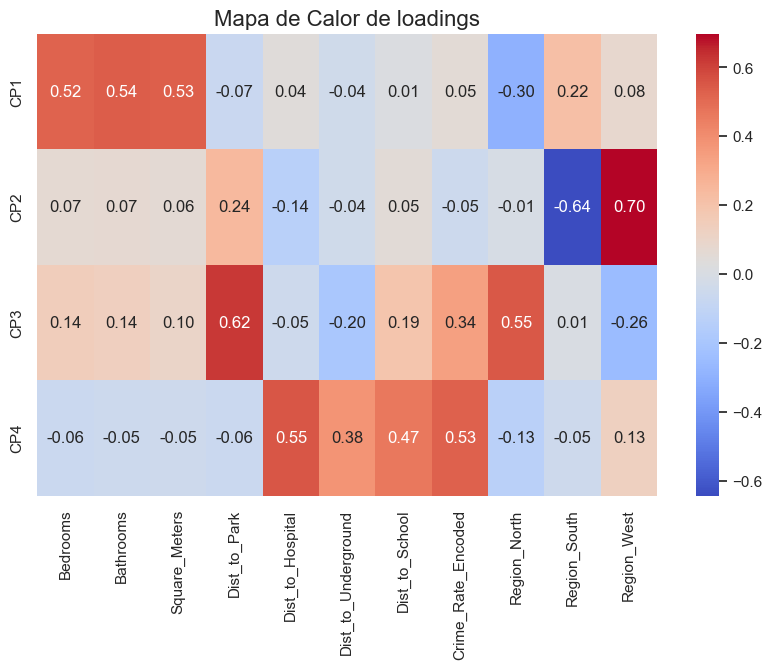

In [87]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_crimen_loadings, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de loadings', fontsize=16)
plt.show()

## 5.2. Realiza una interpretaci√≥n de los componentes. ¬øCu√°les variables tienen las cargas altas y positivas y cu√°les las cargas altas y negativas? De acuerdo con este an√°lisis, ¬øqu√© nombre le dar√≠as a cada componente?